In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import skimage
import cv2
import numpy as np
from skimage import io

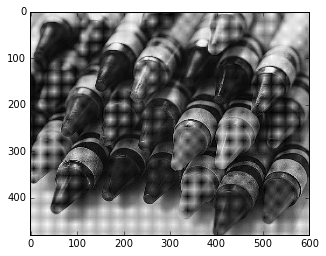

In [2]:
im = io.imread('test/P2-crayons-raw.bmp')
plt.imshow(im, cmap='gray')
im = im.astype(float)

In [3]:
def mydemosaic(I):
    x = (I.shape[0] + 1)
    y = (I.shape[1] + 1)
    x_2 = (I.shape[0] + 1) / 2
    y_2 = (I.shape[1] + 1) / 2

    redtileunit = np.array([[1, 0], [0, 0]])
    redtile = np.tile(redtileunit, (x_2, y_2))[:x, :y]

    greentileunit = np.array([[0, 1], [1, 0]])
    greentile = np.tile(greentileunit, (x_2, y_2))[:x, :y]

    bluetileunit = np.array([[0, 0], [0, 1]])
    bluetile = np.tile(bluetileunit, (x_2, y_2))[:x, :y]

    redpixels = I * redtile
    greenpixels = I * greentile
    bluepixels = I * bluetile

    redbluefilter = np.array([[1, 2, 1],
                              [2, 4, 2],
                              [1, 2, 1]]) * 0.25
    greenfilter = np.array([[0, 1, 0],
                            [1, 4, 1],
                            [0, 1, 0]]) * 0.25

    def filter2D(img, flt):
        return cv2.filter2D(img, -1, flt, borderType=cv2.BORDER_CONSTANT)

    rchannel = filter2D(redpixels, redbluefilter)
    gchannel = filter2D(greenpixels, greenfilter)
    bchannel = filter2D(bluepixels, redbluefilter)
    
    demosaiced = np.stack((rchannel, gchannel, bchannel), 2)
    return demosaiced

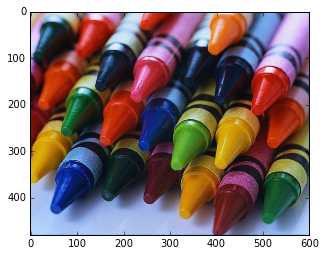

In [4]:
J = mydemosaic(im).astype('uint8')
io.imsave('output/P2-crayons-demosaic.jpg', J)
plt.imshow(J)

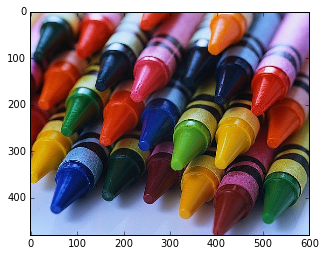

In [5]:
imvendor = io.imread('test/P2-crayons.jpg')
plt.imshow(imvendor)
imvendor = imvendor.astype(float)

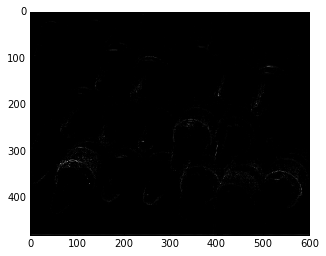

In [6]:
error = ((imvendor - J) ** 2).sum(axis=2)
error = error * 255 / error.max()
io.imsave('output/P2-crayons-error.jpg', skimage.img_as_ubyte(error.astype('uint8')))
plt.imshow(error, cmap='gray')